<a href="https://colab.research.google.com/github/Daniel-Loaiza/Coursera_Capstone/blob/master/Coursera_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c anaconda pandas-profiling
#! pip install pandas-profiling
import pandas_profiling
import seaborn as sns
%matplotlib inline

/bin/bash: conda: command not found


In [144]:
demographics = pd.read_csv('/content/drive/My Drive/Colab Notebooks/demographics.csv', sep=';',header=0)
demographics.head()

,borough,nta_code,nta_name,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bronx,BX31,Allerton-Pelham Gardens,28903,1679,1706,1763,2039,1964,1703,1798,1654,1937,2203,2027,1785,1619,5026,40,39.8,9587,836,348,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Bronx,BX05,Bedford Park-Fordham North,54415,4517,4183,4058,4623,4693,4663,4262,3854,3830,3786,3490,2724,2029,3703,31,158.3,18636,3096,2319,3041,2063,2431,2728,1583,1077,149,149,29549,41324
2,Bronx,BX06,Belmont,27378,2076,2073,1969,3458,3937,2157,1846,1761,1580,1622,1229,966,756,1948,25,87.4,8643,1993,1202,1648,1215,836,950,366,329,90,14,21924,31783
3,Bronx,BX07,Bronxdale,35538,2458,2311,2404,2600,2629,2953,2636,2389,2491,2546,2364,1960,1575,4222,35,101.8,13361,2283,1192,1742,1199,1890,2128,1615,1018,238,56,36859,47292
4,Bronx,BX01,Claremont-Bathgate,31078,2890,2816,2769,3113,2658,2325,2012,1836,2078,2095,1830,1293,1070,2293,28,82.4,10299,2594,1744,1760,1211,1083,1193,323,327,56,8,20461,29720


In [112]:
demographics.describe()

,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years,median_age,people_per_acre,households,"less_than_10,000",10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
count,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,43397.175532,2752.12766,2515.478723,2489.159574,2842.632979,3404.617021,3872.106383,3512.468085,3116.265957,3007.898936,2999.989362,2875.414894,2526.154255,2202.872340,5279.989362,36.122340,68.946809,16462.420213,1700.755319,1023.042553,1750.861702,1487.734043,1909.824468,2544.452128,1803.074468,2078.186170,939.824468,1224.664894,57002.489362,77808.877660
std,21288.062949,1695.80947,1496.808314,1459.440306,1574.371410,1886.482082,2462.683806,2113.358863,1704.685137,1531.520696,1486.184531,1430.098885,1305.172176,1184.907187,3013.103854,5.003841,44.558080,9239.891603,1248.342166,715.513733,1065.437156,893.651778,1076.642531,1415.221055,1041.592900,1430.129096,890.562915,2315.006940,24341.286390,38791.512605
min,13354.000000,506.00000,408.000000,326.000000,449.000000,798.000000,736.000000,742.000000,689.000000,743.000000,789.000000,830.000000,756.000000,756.000000,1505.000000,20.000000,5.600000,5559.000000,166.000000,87.000000,191.000000,371.000000,496.000000,782.000000,241.000000,201.000000,20.000000,8.000000,20334.000000,29720.000000
25%,27237.000000,1490.50000,1443.500000,1437.750000,1619.000000,1929.500000,2089.250000,1928.000000,1835.750000,1867.500000,1933.250000,1894.500000,1608.250000,1396.500000,3149.000000,33.000000,35.100000,9966.000000,742.500000,461.250000,930.000000,827.750000,1139.500000,1504.750000,1111.000000,1220.250000,426.500000,248.750000,39015.000000,54656.750000
50%,37897.000000,2386.00000,2228.500000,2197.500000,2568.000000,2956.000000,3081.500000,2893.000000,2555.500000,2520.000000,2586.500000,2406.500000,2076.000000,1863.500000,4675.000000,35.500000,60.850000,13940.000000,1410.000000,838.500000,1504.500000,1209.000000,1629.000000,2134.000000,1580.000000,1819.500000,760.000000,517.500000,53114.500000,70396.000000
75%,54244.750000,3579.25000,3242.750000,3263.750000,3717.250000,4527.000000,5252.750000,4611.000000,4034.500000,3778.500000,3812.000000,3572.250000,3088.750000,2698.750000,6467.250000,39.000000,97.825000,19989.500000,2304.250000,1345.000000,2235.250000,2066.500000,2494.250000,3117.500000,2328.500000,2462.500000,1068.750000,963.000000,71430.750000,89989.500000
max,132378.000000,14703.00000,11971.000000,10024.000000,9094.000000,10046.000000,11971.000000,11292.000000,10406.000000,10004.000000,9557.000000,9393.000000,9469.000000,9283.000000,22569.000000,56.000000,244.200000,66482.000000,6516.000000,3683.000000,5231.000000,4549.000000,5901.000000,7655.000000,6109.000000,9962.000000,6359.000000,15031.000000,155213.000000,311109.000000


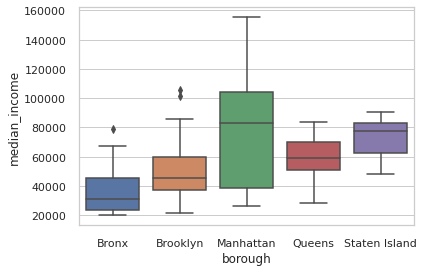

In [125]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="median_income", data=demographics)

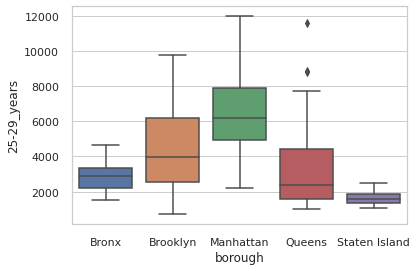

In [133]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="25-29_years", data=demographics)

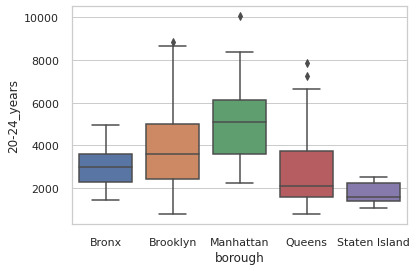

In [134]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="borough", y="20-24_years", data=demographics)

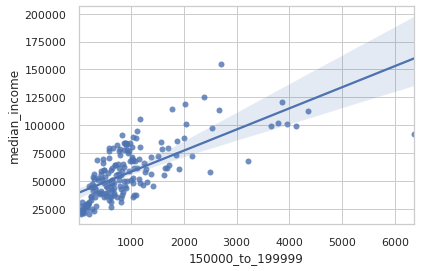

In [146]:
ax = sns.regplot(x="150000_to_199999", y="median_income", data=demographics)

In [0]:
pd.read_csv('https://geo.nyu.edu/catalog/nyu_2451_34572/')

In [71]:
import json # library to handle JSON files
with open('/content/drive/My Drive/Colab Notebooks/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

# Tranform the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods_data = newyork_data['features']

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
# neighborhoods

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()    

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [73]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [0]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [0]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
# manhattan_data.head()

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [76]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [77]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO' # your Foursquare ID
CLIENT_SECRET = 'H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KB1MGMXSFCU5NXWQWFVLPFNXZE3VRN3G5WC05TC0YNPUYDUO
CLIENT_SECRET:H1X3QY13IMSN3H1BTZQMKOOZAG2YAQXQWW1CNOND4RHTJVY3


In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [81]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [82]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [83]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,77,77,77,77,77,77
Carnegie Hill,94,94,94,94,94,94
Central Harlem,41,41,41,41,41,41
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [0]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

In [0]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [0]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examing Clusters

In [0]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [0]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [0]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [0]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [0]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]